# MNIST classification

In this session we will learn to design and train simple neural networks and observe their performance on a digit dataset called MNIST. To do this, we will use the [Keras API](https://keras.io/) with tensorflow, which will allow us to train and evaluate models in a simple way with a few lines of code.

In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline
from utils import plot_samples, plot_curves
import time

Using TensorFlow backend.


In [2]:
import numpy as np
# force random seed for results to be reproducible
SEED = 4242
np.random.seed(SEED)

## Dataset

Let's begin by loading the MNIST dataset, which we will use during the whole session.

(60000, 28, 28)

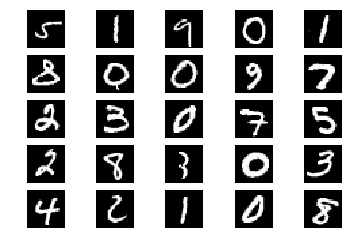

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Display some of the samples
plot_samples(X_train)
X_train.shape

## Multiclass softmax

We will design a network with a single layer, with as many neurons as categories in our dataset. Each output will be a fuction of all inputs (pixels)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
# in the first layer we need to specify the input shape
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 10)            7850        dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 10)            0           dense_1[0][0]                    
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
____________________________________________________________________________________________________


**Exercise**: ```model.summary()``` gave us the total number of trainable parameters of our model. How is this number obtained? 

**Answer**: Number of parameters: 10*784 + 10

We flatten and normalize images to match the input that the network expects:

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Categories need to be converted to one-hot vectors for training:

In [6]:
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
y_train, Y_train

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.]]))

We are now ready to train. Let's define the optimizer:

In [7]:
from keras.optimizers import SGD
lr = 0.01
# For now we will not decrease the learning rate
decay = 0

optim = SGD(lr=lr, decay=decay, momentum=0.9, nesterov=True)

In Keras, we need to compile the model to define the loss and the optimizer we want to use. Since we are dealing with a classification problem, we will use the cross entropy loss, which is already defined in keras. Additionally, we will incorporate the accuracy as an additional metric to compute at the end of each epoch:

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

Now let's train the model. ```model.fit()``` will do the training loop for us. We just need to pass the training data ```X_train``` and labels ```Y_train``` as input, specify the ```batch_size``` and the number of epochs ```nb_epoch``` we want to do. We also pass the test set ```(X_test,Y_Test)``` as validation data, which will allow us to see how the model performs on the test data as training progresses. Let's run it:

In [9]:
batch_size = 32
nb_epoch = 20
verbose = 2

t = time.time()
history = model.fit(X_train, Y_train,
                batch_size=batch_size, nb_epoch=nb_epoch,
                verbose=verbose,validation_data=(X_test, Y_test))

print (time.time() - t, "seconds.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
2s - loss: 0.4180 - acc: 0.8838 - val_loss: 0.3071 - val_acc: 0.9170
Epoch 2/20
2s - loss: 0.3135 - acc: 0.9115 - val_loss: 0.2898 - val_acc: 0.9199
Epoch 3/20
2s - loss: 0.2968 - acc: 0.9163 - val_loss: 0.2818 - val_acc: 0.9200
Epoch 4/20
2s - loss: 0.2880 - acc: 0.9196 - val_loss: 0.2753 - val_acc: 0.9230
Epoch 5/20
2s - loss: 0.2815 - acc: 0.9214 - val_loss: 0.2768 - val_acc: 0.9233
Epoch 6/20
2s - loss: 0.2766 - acc: 0.9220 - val_loss: 0.2747 - val_acc: 0.9225
Epoch 7/20
3s - loss: 0.2738 - acc: 0.9239 - val_loss: 0.2731 - val_acc: 0.9226
Epoch 8/20
3s - loss: 0.2713 - acc: 0.9247 - val_loss: 0.2719 - val_acc: 0.9249
Epoch 9/20
2s - loss: 0.2683 - acc: 0.9259 - val_loss: 0.2762 - val_acc: 0.9217
Epoch 10/20
2s - loss: 0.2665 - acc: 0.9261 - val_loss: 0.2756 - val_acc: 0.9229
Epoch 11/20
3s - loss: 0.2645 - acc: 0.9271 - val_loss: 0.2707 - val_acc: 0.9238
Epoch 12/20
3s - loss: 0.2631 - acc: 0.9267 - val_loss: 0.2703 - val

We can plot the loss and accuracy curves with the ```history``` object returned by ```model.fit()```. The function ```plot_curves```, which is defined in ```utils.py``` will do this for us.

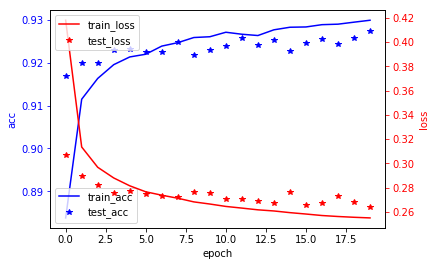

In [10]:
plot_curves(history,nb_epoch)

The curve trend indicates that the model may be able to improve if we train it for longer, but for now let's leave it here.

Let's now evaluate our model. ```model.evaluate()``` will take all the test samples, forward them through the network and return the average loss, and any additional metrics we specified (in our case, the accuracy).

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print ("Loss: %f"%(score[0]))
print ("Accuracy: %f"%(score[1]))

Loss: 0.264356
Accuracy: 0.927400


We reach an accuracy of 92%, which is similar to the one we obtained in the previous exercise.

## Adding a hidden layer

Let's try to train a model with a hidden layer between the input and the classifier. 

**Exercise**: Modify the previous architecture to include this layer with 128 neurons and train it. Take into account that the ```input_shape``` must be passed to the first layer of the network.

In [15]:
import numpy as np
np.random.seed(SEED)

# MODEL DEFINITION
model = Sequential()

model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 128)           100480      dense_input_3[0][0]              
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 128)           0           dense_4[0][0]                    
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 10)            1290        activation_4[0][0]               
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 10)            0           dense_5[0][0]                    
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
___________________

**Exercise**: Compute the number of parameters and check if they match the ones given by ```model.summary()```

**Answer**:

In [13]:
in_dim = 784
hidden_dim = 128
cls_dim = 10

l1 = hidden_dim*in_dim + hidden_dim
l2 = hidden_dim*cls_dim + cls_dim

l1 + l2

101770

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
5s - loss: 0.3045 - acc: 0.9126 - val_loss: 0.1708 - val_acc: 0.9503
Epoch 2/20
5s - loss: 0.1441 - acc: 0.9577 - val_loss: 0.1206 - val_acc: 0.9630
Epoch 3/20
5s - loss: 0.1041 - acc: 0.9698 - val_loss: 0.0954 - val_acc: 0.9714
Epoch 4/20
5s - loss: 0.0824 - acc: 0.9760 - val_loss: 0.0937 - val_acc: 0.9728
Epoch 5/20
5s - loss: 0.0683 - acc: 0.9800 - val_loss: 0.0809 - val_acc: 0.9734
Epoch 6/20
5s - loss: 0.0572 - acc: 0.9831 - val_loss: 0.0798 - val_acc: 0.9753
Epoch 7/20
5s - loss: 0.0488 - acc: 0.9863 - val_loss: 0.0780 - val_acc: 0.9750
Epoch 8/20
5s - loss: 0.0417 - acc: 0.9884 - val_loss: 0.0768 - val_acc: 0.9755
Epoch 9/20
5s - loss: 0.0360 - acc: 0.9900 - val_loss: 0.0739 - val_acc: 0.9762
Epoch 10/20
5s - loss: 0.0319 - acc: 0.9915 - val_loss: 0.0725 - val_acc: 0.9775
Epoch 11/20
5s - loss: 0.0281 - acc: 0.9927 - val_loss: 0.0709 - val_acc: 0.9774
Epoch 12/20
5s - loss: 0.0241 - acc: 0.9939 - val_loss: 0.0685 - val

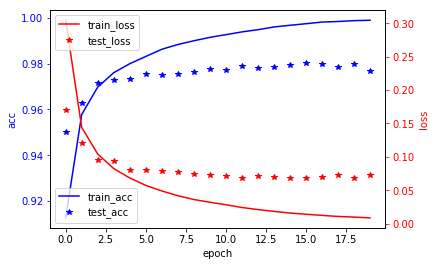

In [14]:
# COMPILE & TRAIN
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

t = time.time()
history = model.fit(X_train, Y_train,
                batch_size=batch_size, nb_epoch=nb_epoch,
                verbose=2,validation_data=(X_test, Y_test))
print (time.time() - t, "seconds.")

score = model.evaluate(X_test, Y_test, verbose=0)
print ("-"*10)
print ("Loss: %f"%(score[0]))
print ("Accuracy: %f"%(score[1]))
plot_curves(history,nb_epoch)

So, adding a hidden layer pushed the accuracy from 0.92 to almost 0.98. Of course the number of parameters has increased significantly. 

But... what happened to the training curves? While we significantly improved the performance with just a single layer, now our model is overfitting. How do we fix this?

## Dropout

**Exercise**: Add a dropout layer to the model and see their effect in the training curves & accuracy. See the documentation for the [Dropout](https://keras.io/layers/core/#dropout) layer in keras.

**Answer:**

In [16]:
import numpy as np
np.random.seed(SEED)

from keras.layers import Dropout

dratio = 0.2
H_DIM = 128

model = Sequential()
model.add(Dense(H_DIM, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(dratio))
model.add(Dense(10))
model.add(Activation('softmax'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
5s - loss: 0.3337 - acc: 0.9029 - val_loss: 0.1659 - val_acc: 0.9515
Epoch 2/20
6s - loss: 0.1733 - acc: 0.9495 - val_loss: 0.1191 - val_acc: 0.9645
Epoch 3/20
6s - loss: 0.1334 - acc: 0.9605 - val_loss: 0.1003 - val_acc: 0.9690
Epoch 4/20
6s - loss: 0.1125 - acc: 0.9666 - val_loss: 0.0898 - val_acc: 0.9725
Epoch 5/20
6s - loss: 0.0967 - acc: 0.9714 - val_loss: 0.0799 - val_acc: 0.9760
Epoch 6/20
6s - loss: 0.0877 - acc: 0.9737 - val_loss: 0.0760 - val_acc: 0.9753
Epoch 7/20
6s - loss: 0.0793 - acc: 0.9760 - val_loss: 0.0747 - val_acc: 0.9772
Epoch 8/20
6s - loss: 0.0723 - acc: 0.9782 - val_loss: 0.0741 - val_acc: 0.9777
Epoch 9/20
6s - loss: 0.0680 - acc: 0.9788 - val_loss: 0.0756 - val_acc: 0.9769
Epoch 10/20
7s - loss: 0.0616 - acc: 0.9806 - val_loss: 0.0733 - val_acc: 0.9783
Epoch 11/20
6s - loss: 0.0568 - acc: 0.9824 - val_loss: 0.0664 - val_acc: 0.9789
Epoch 12/20
6s - loss: 0.0543 - acc: 0.9837 - val_loss: 0.0668 - val

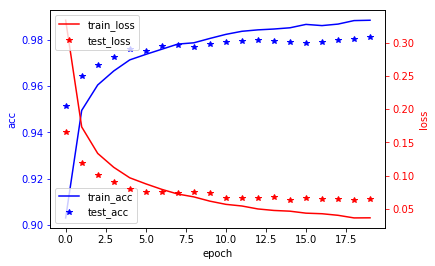

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])
t = time.time()
history = model.fit(X_train, Y_train,
                batch_size=batch_size, nb_epoch=nb_epoch,
                verbose=verbose,validation_data=(X_test, Y_test))
print (time.time() - t, "seconds.")

score = model.evaluate(X_test, Y_test, verbose=0)
print ("-"*10)
print ("Loss: %f"%(score[0]))
print ("Accuracy: %f"%(score[1]))
plot_curves(history,nb_epoch)

Did this improve the curves? What about the accuracy?